### 1

We know that the Bayes risk of the OLS problem is σ². We have:

$$
\frac{n - d}{n}σ² < σ²
$$

This shows that the value in Proposition 1 underestimates the risk, since the bayes risk is the ideal risk. We also see that the more d is close to n, the smaller this evaluation will be, meaning that with a dimensionality too high the model will overfit.

### 2

We have the following equations:
$$
\hat\theta = (X^TX)^{-1}X^Ty \\
y = X\theta^* + \epsilon 
$$

Which gives us:
$$
\begin{aligned}
\hat\theta &= (X^TX)^{-1}X^T X\theta^* + (X^TX)^{-1}X^T \epsilon \\
\hat\theta &=  \theta^*+ (X^TX)^{-1}X^T \epsilon 
\end{aligned}
$$

We can then replace y and θ in the equation 4:

$$
\begin{aligned}
E[R_n(\hat\theta)] &= E[\frac1n ||X\theta^* + \epsilon - X(\theta^*+ (X^TX)^{-1}X^T \epsilon)||²] \\
E[R_n(\hat\theta)] &= E[\frac1n ||X(\theta^* - \theta^* - (X^TX)^{-1}X^T \epsilon) + \epsilon||²] \\
E[R_n(\hat\theta)] &= E[\frac1n || \epsilon - X(X^TX)^{-1}X^T\epsilon||²] \\
E[R_n(\hat\theta)] &= E[\frac1n ||(I_n - X(X^TX)^{-1}X^T) \epsilon||²] 
\end{aligned}
$$


### 3

When multiplying a matrix with it's transpose, we end up on the diagonal with the sum of the terms on the line squared. This means that when taking the sum of these, we obtain the sum of all the terms squared, as shown in the equation 10.

### 4 

We start from the definition of the squared norm:

$$
\|A \varepsilon\|^2 = (A \varepsilon)^\top (A \varepsilon) = \varepsilon^\top A^\top A \varepsilon
$$


This shows that:

$$
\begin{aligned}
\mathbb{E}_\varepsilon \left[ \frac{1}{n} \| A \varepsilon \|^2 \right] 
&= \frac{1}{n} \mathbb{E}_\varepsilon \left[ \varepsilon^\top A^\top A \varepsilon \right] \\
&= \frac{1}{n} \sigma^2 \operatorname{tr}(A^TA)
\end{aligned}
$$

### 5

$$
\begin{aligned}
A^TA &= (I_n - X(X^TX)^{-1}X^T)^T \times (I_n - X(X^TX)^{-1}X^T) \\
&= (I_n^T - X((X^TX)^{-1})^T X^T)I_n - (I_n^T - X((X^TX)^{-1})^T X^T) \times X(X^TX)^{-1} X^T \\
&= I_n - X((X^TX)^{-1})^T X^T - X(X^TX)^{-1} X^T + X((X^TX)^{-1})^T X^T \times X(X^TX)^{-1} X^T \\
&= I_n - X((X^TX)^{-1})^T X^T - X(X^TX)^{-1} X^T + X((X^TX)^{-1})^T X^T \\
&= I_n - X(X^TX)^{-1} X^T \\
&= A
\end{aligned}
$$

### 6
$$
\begin{aligned}
E[R_n(\hat\theta)] &= \frac{\sigma^2}{n} \operatorname{tr}(A^TA) \\
&= \frac{\sigma^2}{n} \operatorname{tr}(A) \\
&= \frac{\sigma^2}{n} (\operatorname{tr}(I_n) - \operatorname{tr}(X(X^TX)^{-1}X^T)) \\
&= \frac{\sigma^2}{n} (n - \operatorname{tr}(X(X^TX)^{-1}X^T))
\end{aligned}
$$

and since $X(X^TX)^{-1}X^T$ is a projection, $\operatorname{tr}(X(X^TX)^{-1}X^T)$ = d

We end up back on the equation 8, proving it.

### 7

### 8

In [7]:
import numpy as np
import matplotlib.pyplot as plt

sigma = 8
bayes_risk = sigma ** 2
n = 8
d = 4

X = np.random.normal(0, sigma, (n, d))

In [ ]:
y = X 

array([[-1.86456447, -0.41760506,  5.80551103, -3.43036745],
       [-3.37751088,  4.7244288 ,  2.63621534,  0.89865379],
       [ 1.0221513 , -1.95438096,  0.76926232, -1.49493069],
       [ 1.43546441,  0.58116048, -5.03625626, -0.4824762 ],
       [ 0.63465202,  3.48468519,  3.58200569, -1.59537963],
       [-2.21037766,  3.38886647, -2.10496716, -3.78301931],
       [-1.9230625 , -5.8968196 , -4.56352335,  3.37681381],
       [ 1.24449805,  4.8648021 , -2.81199854, -1.56917476]])

In [ ]:
def generate_output_data(
    X: np.ndarray, theta_star: np.ndarray, sigma: float, rng, n_repetitions: int
) -> np.ndarray:
    """
    Generate output data according to the linear model, fixed design setup
    - X is fixed
    - y is random, according to

    y = Xtheta_star + epsilon

    where epsilon is a centered gaussian noise vector with variance
    sigma*In

    Parameters:
        X: (n, d) design matrix
        theta_star: (d, 1) vector (optimal parameter)
        sigma (float): variance of the noise

    Returns:
        y (float matrix): output vectors in a matrix of size (n, n_repetitions)
        n_repetitions > 1 allows to perform several tests and to statistically
        average the results.
    """
    n = X.shape[0]
    noise = rng.normal(0, sigma, size=(n, n_repetitions))
    y = X @ theta_star + noise
    return y


def OLS_estimator(X: np.ndarray, y: np.ndarray) -> np.ndarray:
    """
    Compute OLS estimators from the data.

    We obtain as many OLS estimators as there are columns in y.
    This is useful in this exercice in order to average the results
    of the test errors afterwards.

    Parameters:
        X: (n, d) matrix
        y: (n, n_repetitions) matrix

    Returns:
        theta_hat: (d, n_repetitions) matrix, one column is one OLS estimator.
    """
    covariance_matrix = X.T @ X
    inverse_covariance = np.linalg.inv(covariance_matrix)
    theta_hat = inverse_covariance @ (X.T @ y)
    return theta_hat


def ols_test_error(
    n_train: int,
    d: int,
    n_repetitions: int,
) -> float:
    """
    Statistical evaluation of the generalization error of the OLS estimator.
    The generalization error is an expected value. We approximate this
    expected value by sampling some data, computing test errors, and repeting the simulation a
    number of times that is approximately sufficient to observe convergence.

    n_repetitions times, do:
        - Draw output vector y_train, according to the linear model, fixed
        design setup.
        - compute the corresponding OLS estimators. Each OLS estimator will be
          different.
        - generate a y_test in order to have an estimation of the generalization error of
        this estimator

    Importantly, our expected value is taken over the whole data generation
    process. As the OLS estimator depends on the y_train, several OLS
    estimators will be computed.

    In the fixed design setting, which is a specific case, y_train and y_test
    contain the same number of samples, equal to n_train here.

    Parameters:
        n_train (int): number of samples in the train dataset
        d (int): dimension of each sample (number of features)
        n_repetitions (int): number of simulations run in order to average the
        results

    Returns:
        mean_test_error (float): estimation of the generalization error of the OLS
        estimator in this statistical setting
    """
    # instantiate a PRNG
    rng = np.random.default_rng()

    # design matrix
    X = rng.uniform(low=0, high=1, size=(n_train, d))

    # Bayes predictor
    theta_star = rng.uniform(low=0, high=1, size=(d, 1))

    # generate train data
    # n_repetitions output vectors of size (n,1) are generated,
    # in order to statistically average the results
    y_train = generate_output_data(
        X=X,
        theta_star=theta_star,
        sigma=sigma,
        rng=rng,
        n_repetitions=n_repetitions,
    )

    # compute the OLS regression estimators
    # there will be one different estimator per
    # output vector y
    theta_hat = OLS_estimator(
        X=X,
        y=y_train,
    )

    # generate test data
    # also n_repetitions output vectors of size (n,1) are generated
    y_test = generate_output_data(
        X=X,
        theta_star=theta_star,
        sigma=sigma,
        rng=rng,
        n_repetitions=n_repetitions,
    )

    # compute predictions of each OLS estimator
    y_pred = X @ theta_hat

    """
    Compute the test erros on each y_test, and
    average the results in order to have an approximation
    of the expected value.
    """
    n_test = n_train
    mean_test_error = (np.linalg.norm(y_pred - y_test) ** 2 / n_test) / n_repetitions

    return mean_test_error

    """
    Optional: study the variance of the relative distance
    of OLS to the bayes estimator
    """
    # distances = np.linalg.norm(theta_hat - theta_star, axis=0)
    # relative_distances = distances / np.linalg.norm(theta_star)
    # std_relative_distance = relative_distances.std()


In [10]:
def plot_test_errors_ols(
    test_errors: dict[int, float],
    n_list: list[int],
    d_list: list[int],
    n_repetitions: int,
):
    """
    Display all the computed test_errors on a plot
    """
    colors = ["blue", "green", "darkred", "mediumvioletred", "darkmagenta"]
    index = 0

    # plot the test_errors for each n and d
    for index, d in enumerate(d_list):
        print(f"d={d}")
        color = colors[index]
        risk_estimates = [test_errors[n, d] for n in n_list]
        risks_theory = [bayes_risk + sigma**2 * d / n for n in n_list]
        alpha = 0.6
        # extended label for the first ont
        if index == 0:
            label_est = f"test error, d={d}"
            label_th = r"$\sigma^2+\frac{\sigma^2d}{n}$" + f", d={d}"
            plt.plot(
                n_list,
                risk_estimates,
                "o",
                label=label_est,
                color=color,
                markersize=3,
                alpha=alpha,
            )
            plt.plot(n_list, risks_theory, label=label_th, color=color, alpha=alpha)
        else:
            label_est = f"d={d}"
            plt.plot(
                n_list,
                risk_estimates,
                "o",
                label=label_est,
                color=color,
                markersize=3,
                alpha=alpha,
            )
            plt.plot(n_list, risks_theory, color=color, alpha=alpha)

    # plot bayes risk
    plt.plot(
        n_list,
        [bayes_risk] * len(n_list),
        label="Bayes risk: " + r"$\sigma^2$",
        color="aqua",
    )

    # finish plot
    plt.xlabel("number of sampler in the train set")
    plt.ylabel("test error")
    plt.title(
        f"OLS: test errors as a function of n and d\nn repetitions {n_repetitions}"
    )
    plt.legend(loc="best")

    plt.show()

n_repetitions=10
d=2
d=5
d=10
d=20
d=30


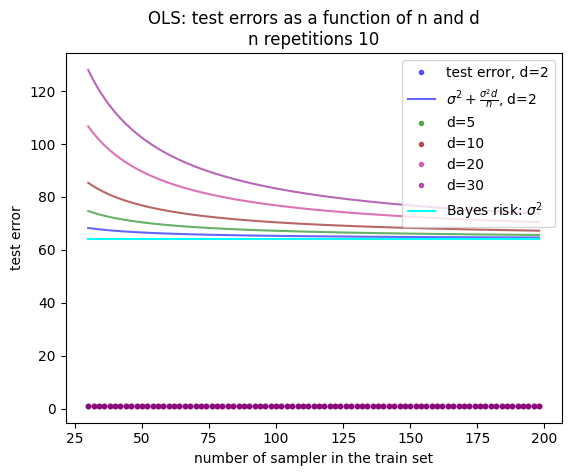

n_repetitions=100
d=2
d=5
d=10
d=20
d=30


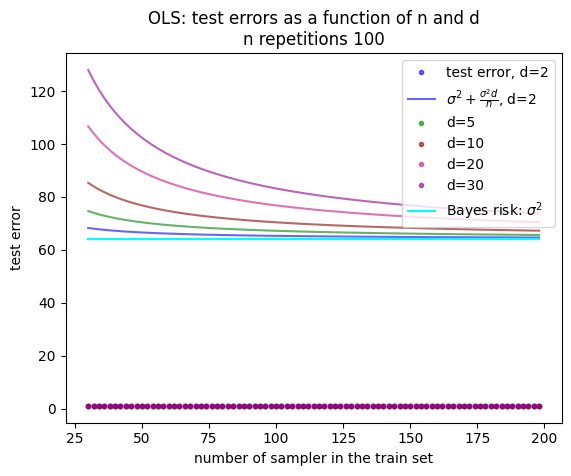

n_repetitions=1000
d=2
d=5
d=10
d=20
d=30


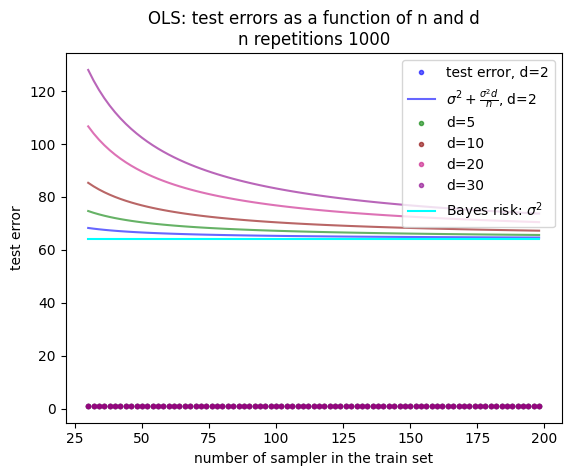

n_repetitions=10000
d=2
d=5
d=10
d=20
d=30


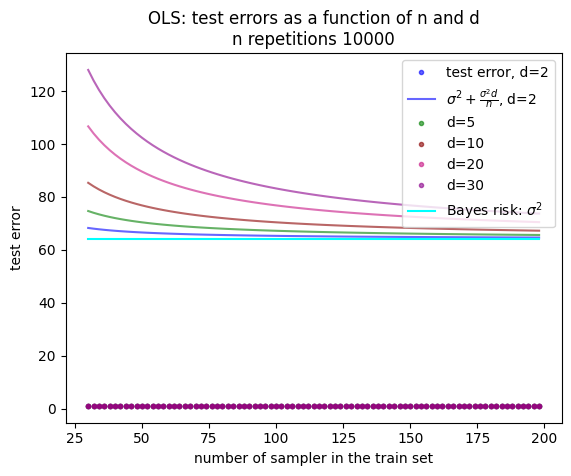

In [11]:
n_train_list = list(range(30, 200, 2))
d_list = [2, 5, 10, 20, 30]
n_repetitions_list = [10, 100, 1000, 10000]

    # Assess the influence of different values of n and d
    # store the test errors in a dict, each key being a (n, d) pair
test_errors = dict()
for n_repetitions in n_repetitions_list:
    print(f"{n_repetitions=}")
    for n_train in n_train_list:
        for d in d_list:
            test_errors[(n_train, d)] = ols_test_error(
                n_train=n_train,
                d=d,
                n_repetitions=n_repetitions,
            )
    plot_test_errors_ols(
        test_errors=test_errors,
        n_list=n_train_list,
        d_list=d_list,
        n_repetitions=n_repetitions,
    )